# Understanding Regression with R

## Introduction

This notebook uses a simple R simulation to illustrate some basic principles of regression models.  Specifically, this notebook proceeds through the following steps. 

- Create a test data set.
- Plot the data set.
- Compute and plot the results of a linear regression model on these data.
- Compute and plot the results of linear regression models for data sets with increassing dispursion of theh data.
- Compute and plot the results of linear regression models for data sets with outliers.

## Create the data set

The code in the cell below computes the data set. The data are along a strait line with intercept of 0 and a slope of 1, with Normally distributed noise added. Run this code and examine the first few lines of the data frame.

In [19]:
sim.reg.data <- function(x1, y1, x2, y2, n, sd){
  w <- rnorm(n, mean = 0, sd = sd)
  data.frame(
              x = seq(from = x1, to = x2, length.out = n),
              y = (seq(from = y1, to = y2, length.out = n) + w)
            )
}
sim.data = sim.reg.data(0, 0, 10, 10, 50, 1)
head(sim.data)

x,y
0.0000000,1.2308939
0.2040816,0.1497144
0.4081633,0.5341202
0.6122449,0.5350352
0.8163265,-1.6807638
1.0204082,-0.2449422


## Plot the data set

Run the code in the cell below to plot the data set. Notice that the data falls close to a stright line.

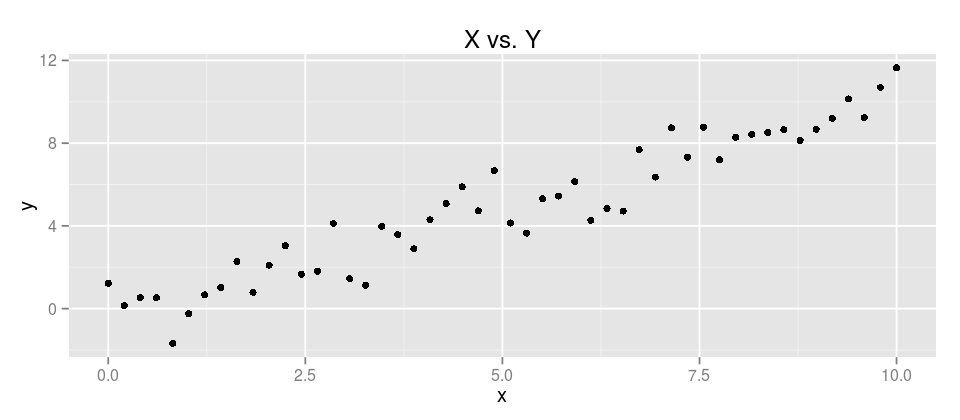

In [20]:
plot.reg <- function(df){
  require(ggplot2)
  ggplot(df, aes(x, y)) + 
    geom_point(size = 2) +
    ggtitle('X vs. Y')
}
plot.reg(sim.data)

## Compute and evaluate the regression model

The code in the cell below does the following:

- The linear regression model is computed and scored.
- The regression line is ploted along with a histogram of the residuals.
- Some model performance statistics are computed.

One of the performance statistics used in adjusted $R^2_{adj}$:

$$R^2_{adj} = 1 - \frac{n-1}{n-p-1} \frac{Sum\ square\ residual}{Sum\ square\ total}\\
where,\ p = number\ of\ model\ parameters$$

Run this code and examine the results. Notice that the intercept and slope are close the exact values. The regression line is shown on the left plot. The histogram of the residuals is shown on the right. The residuals are approximately Normally distributed.

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)



The downloaded source packages are in
	'/tmp/Rtmp2GmuUo/downloaded_packages'
[1] "Intercept = -0.464523592294609"
[1] "Slope = 1.06862202159366"
[1] "Adjusted R^2 = 0.905197436813547"


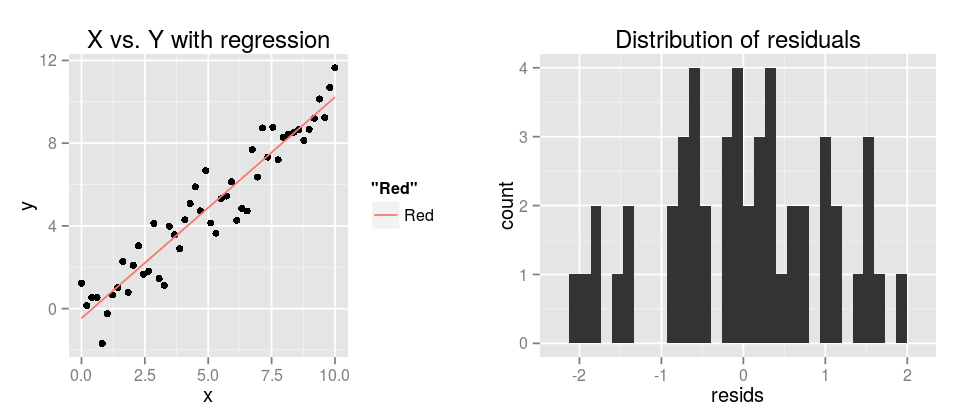

In [38]:
require(repr)
install.packages('gridExtra')
options(repr.plot.width=8, repr.plot.height=3.5)
plot.reg <- function(df){
  require(ggplot2)
  require(gridExtra)
  mod <- lm(y ~ x, data = df)
  df$score <- predict(mod)
  df$resids <- df$y - df$score
  
  p1 <- ggplot(df, aes(x, y)) + 
          geom_point(size = 2) +
          geom_line(aes(x, score, color = 'Red')) + 
          ggtitle('X vs. Y with regression')
 
  p2 <- ggplot(df, aes(resids)) +
           geom_histogram() +
           ggtitle('Distribution of residuals')
  
  grid.arrange(p1, p2, ncol = 2)
  
  print(paste('Intercept =', as.character(mod$coefficients[1])))
  print(paste('Slope =', as.character(mod$coefficients[2])))
  
  Ybar <- mean(df$y)
  SST <- sum((df$y - Ybar)^2)
  SSR <- sum(df$resids^2)
  n <- nrow(df)
  R2 <- 1.0 - (SSR/SST)
  adjR2  <- 1.0 - (SSR/SST) * ((n - 1)/(n - 3))
  print(paste('Adjusted R^2 =', as.character(adjR2)))
}
plot.reg(sim.data)

## Regression with increasing data dispursion

The code in the cell below computes data sets with inceasing dispursion (standard deviation); 1, 5 and 10. The regression model is plotted and evaluated for each data set.

Run this code and examine the results. Notice that the accuracy of the model and dispursion of the residuals of the models increses with increasing dispursion of the data.

[1] "Intercept = 0.266472503293608"
[1] "Slope = 0.940862699434773"
[1] "Adjusted R^2 = 0.893389827202873"


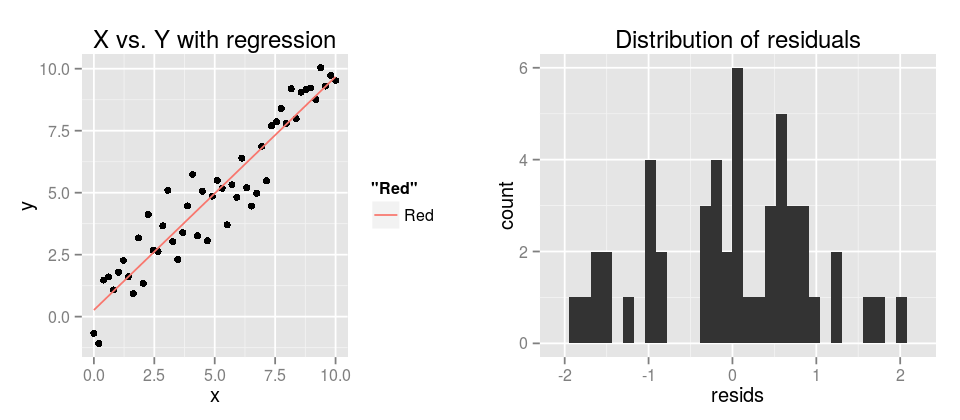

[1] "Intercept = -0.462639606095607"
[1] "Slope = 0.924238479690616"
[1] "Adjusted R^2 = 0.185362002958147"


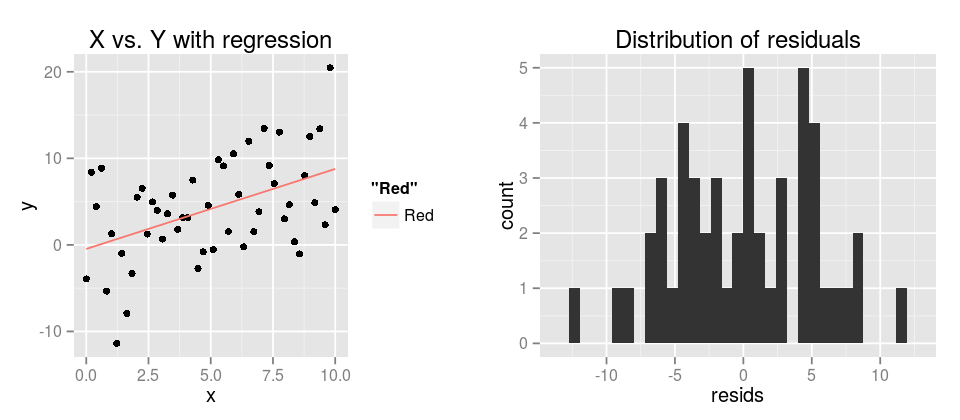

[1] "Intercept = -2.0098323833015"
[1] "Slope = 1.16695849975299"
[1] "Adjusted R^2 = 0.0759387331419423"


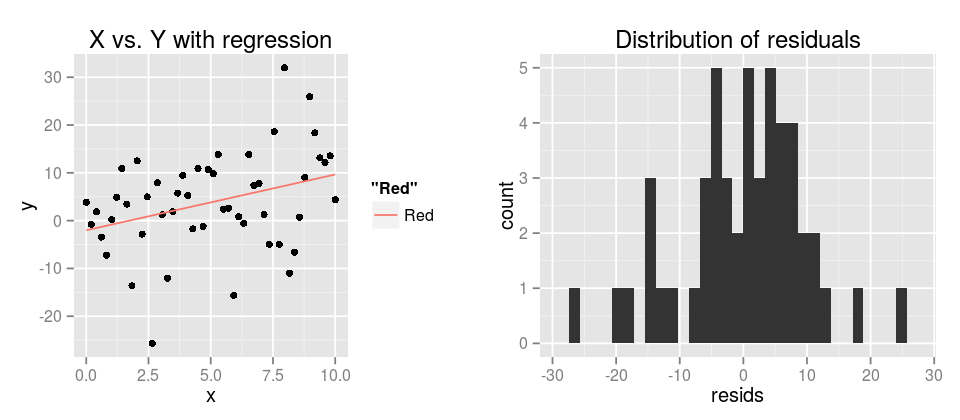

In [39]:
demo.reg <- function(){
  sd <- c(1, 5, 10)
  for(i in 1:3){
    regData <-  sim.reg.data(0, 0, 10, 10, 50, sd[i])
    plot.reg(regData)
  }
}
demo.reg()

## Regression with outlier

The code cell below contins two functions:

- The first functon creates a data set, including  single outlier.
- The second function calls the first to create a data set with the outlier in three different locations. The functions to compute and score the regression model is then called.

Run the code and examine the effects of the single outlier on the regression results. Noice how each position of the outlier has a distict effect on the result.

[1] "Intercept = 0.745114462933429"
[1] "Slope = 0.891418241800653"
[1] 5.114812
[1] "Adjusted R^2 = 0.707448535157063"


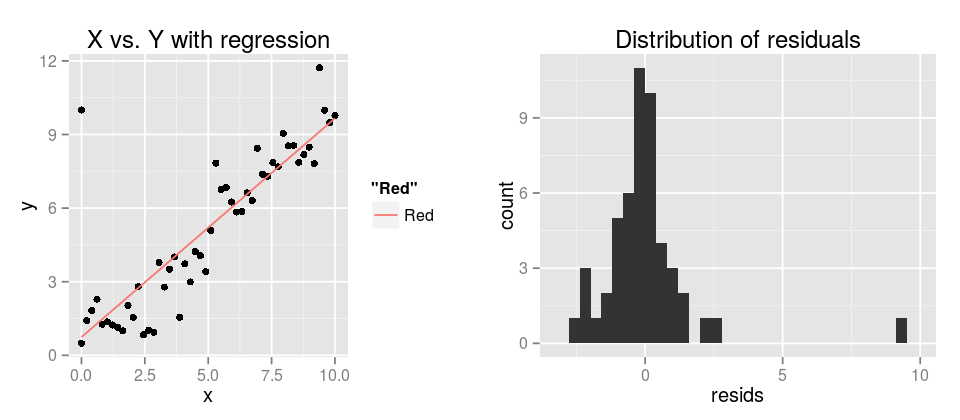

[1] "Intercept = -0.79140811479061"
[1] "Slope = 1.13674811541409"
[1] 4.780887
[1] "Adjusted R^2 = 0.799872428124923"


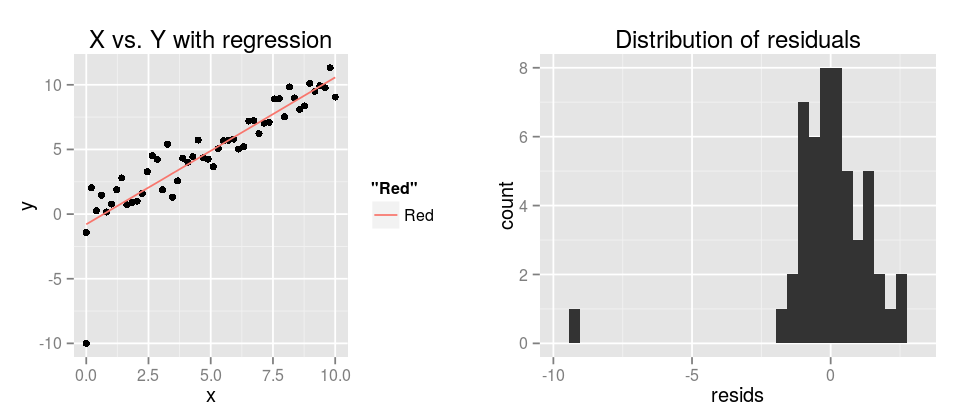

[1] "Intercept = -0.00982390768372456"
[1] "Slope = 1.01058132476231"
[1] 5.043083
[1] "Adjusted R^2 = 0.85602147129424"


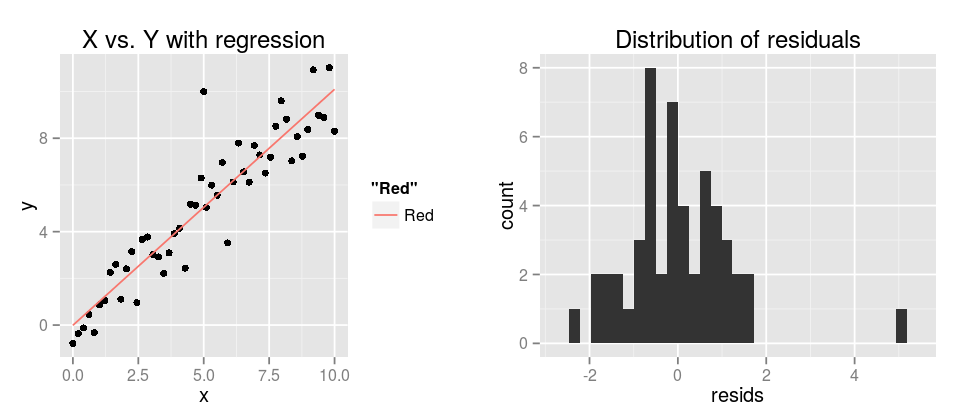

In [37]:
sim.reg.outlier <- function(x1, y1, x2, y2, n, sd, ox, oy){
  w <- rnorm(n, mean = 0, sd = sd)
  df <- data.frame(
            x = c(seq(from = x1, to = x2, length.out = n), ox),
            y = c((seq(from = x1, to = x2, length.out = n) + w), oy)
          )
  df[order(df$x),]
}

demo.outlier <- function(){
  ox <- c(0, 0, 5)
  oy <- c(10, -10, 10)
  for(i in 1:3){
    regData <-  sim.reg.outlier(0, 0, 10, 10, 50, 1, ox[i], oy[i])
    plot.reg(regData)
  }
}

demo.outlier()